In [1]:
pip install qiskit qiskit-machine-learning scikit-learn matplotlib pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.1/263.1 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.3 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=72d34b46c180dab8de06fe15db4bb4f7b705dbc4186ba09bb67da39311549b54
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [3]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 81.8 MB/s eta 0:00:00


In [6]:
pip install qiskit-algorithms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.8/327.8 kB 5.5 MB/s eta 0:00:00


>> Generating Banking Dataset...
>> Building Quantum Kernel...
>> Training Quantum Support Vector Classifier (QSVC)...


/tmp/ipython-input-2380234201.py:30: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation._zz_feature_map.ZZFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the zz_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')


>> Training Complete. Evaluating...

--- RESULTS ---
Classical SVM Accuracy: 0.90
Quantum QSVC Accuracy:  0.70


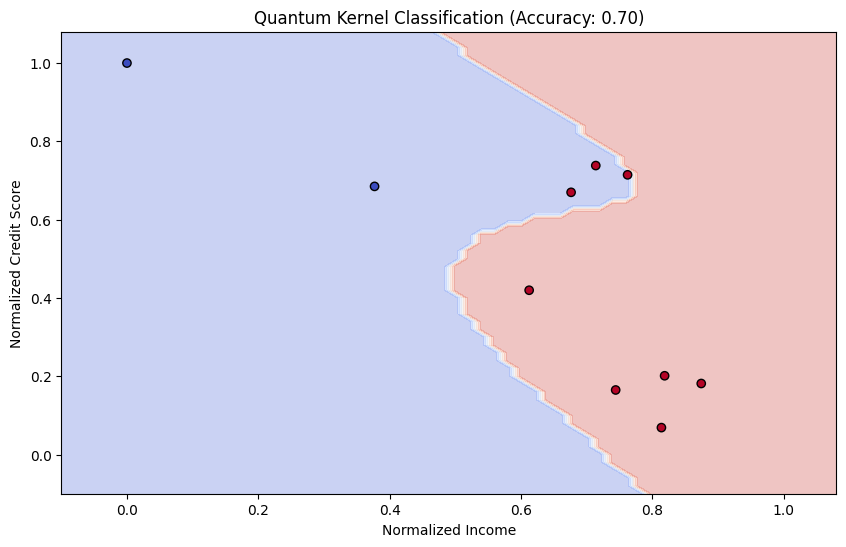

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

# --- STABLE IMPORTS (QSVC) ---
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_aer import AerSimulator

# --- STEP 1: GENERATE DATA ---
print(">> Generating Banking Dataset...")
X, y = make_classification(
    n_samples=50,      # Kept small for instant Quantum simulation
    n_features=2,
    n_informative=2,
    n_redundant=0,
    random_state=42
)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- STEP 2: DEFINE THE QUANTUM KERNEL ---
print(">> Building Quantum Kernel...")
# The Feature Map encodes data into the Quantum State
feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')

# The Kernel calculates the "distance" between data points in Quantum Space
# We explicitly use the AerSimulator to avoid version conflicts
data_kernel = FidelityQuantumKernel(feature_map=feature_map)

# --- STEP 3: TRAIN QSVC (No Optimizer Needed!) ---
print(">> Training Quantum Support Vector Classifier (QSVC)...")
qsvc = QSVC(quantum_kernel=data_kernel)

# This fits the model using the Quantum Kernel Matrix
qsvc.fit(X_train, y_train)

# --- STEP 4: EVALUATE ---
print(">> Training Complete. Evaluating...")
q_score = qsvc.score(X_test, y_test)

# Classical Score for Comparison
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
c_score = svc.score(X_test, y_test)

print(f"\n--- RESULTS ---")
print(f"Classical SVM Accuracy: {c_score:.2f}")
print(f"Quantum QSVC Accuracy:  {q_score:.2f}")

# --- STEP 5: VISUALIZE ---
plt.figure(figsize=(10, 6))
# Plotting decision boundary for 2D data
h = .02  # step size in the mesh
x_min, x_max = X_scaled[:, 0].min() - .1, X_scaled[:, 0].max() + .1
y_min, y_max = X_scaled[:, 1].min() - .1, X_scaled[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict using the Quantum Model
Z = qsvc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k')
plt.title(f"Quantum Kernel Classification (Accuracy: {q_score:.2f})")
plt.xlabel("Normalized Income")
plt.ylabel("Normalized Credit Score")
plt.show()